# Appendix B1

The following examines how the probabilities changes as a the sequence of the same probabilities changes
 
    The model we developed is a framework for which a singular probability is stated by the Source, and updating is done by the Receiver of that probability. A generalisation of this framework into a dynamic context would be where the Receiver gets probabilities from multiple Sources and/or participates in shaping the overall perceived probability. Sequential updating can be done using the framework introduced here, if the Receiver assumes that each of these Sources in independent. For just two opinions (i.e. two stated probabilities from two Sources), updating is done as described above for the first opinion. We can signify the stage of updating by using superscripts, thus the Receiver initially has a_{r}¹,λ¹,n_{r}¹ etc. but after updating from the first Source probability the Receiver sets a_{r}²=π_{r}¹ and n_{r}²=n_{r}¹+N¹ prior to hearing the second probability, whereby the updating from a second probability can be performed. This can be iterated for any number of Source probabilities such that a_{r}^{k}=π_{r}^{k-1}, n_{r}^{k}=n_{r}^{k-1}+N^{k-1}. Each new opinion does not change the ex-ante priors about each new Source, as they are treated as being independent of the other Sources.
        In a truly Bayesian system we would expect that sequential updating would be done in a way that, upon hearing k=1,...K new probabilities, the updating would result in a ex-post probability π_{r}^{K} that is invariant to the ordering that the new probabilities were received. Unsurprisingly, the system we give here does not preserve invariance to the ordering, since while the system may mimic Bayesian updating it does not represent a proper Bayesian system. Readers may be interested, however, in how far it diverges from this goal. For this purpose we did the following set of simulations

 a) K probabilities were drawn from a uniform (number of sources below)
 b) The probabilities were randomly shuffled but were not allowed to have the same ordering
 c) Sequential updating of the probabilities was then performed under the parameters employed in Figure 4.1
 d) a,b,c were repeated for the number of draws draws

In [1]:
from bayesprob import *

def sim(number_of_sources,draws):
    V=[]
    for i in range(draws):
        a1=bayes(iters=1)
        a2=bayes(iters=1)
        lst=list(np.random.uniform(0,1,number_of_sources))
        #lst=[.1,.11]
        random.shuffle(lst)
        lst1=copy(lst)
        random.shuffle(lst)
        lst2=copy(lst)
        if lst2==lst1:
           lst2[:2]=[lst2[1],lst2[0]] 
        m=float(frame(lst2).mean().iloc[0])
        p1=lst1
        p2=lst2
        V1,v1=sequential(p1,a1)
        V2,v2=sequential(p2,a2)
        V+=[[m,v1,v2,(v1+v2)/2]]
    V=frame(V)
    V.columns=['average_p','p_ordering_A','p_ordering_B','av_over_orders']
    V['Distance']=V['p_ordering_A']-V['p_ordering_B']
    return V

<Axes: title={'center': 'Distribution of the Difference'}, ylabel='Frequency'>

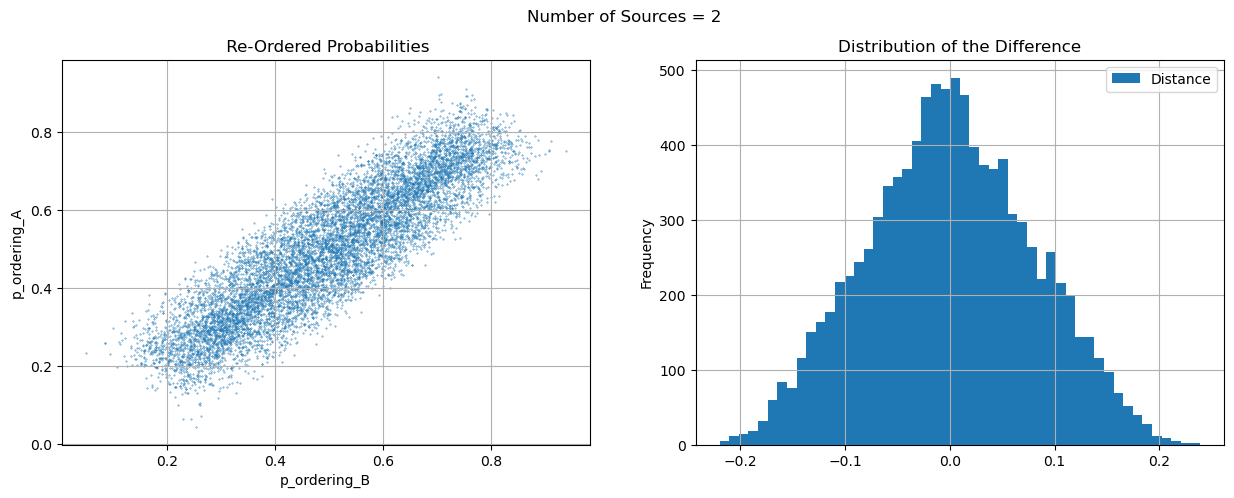

In [2]:
number_of_sources=2

V1=sim(number_of_sources=number_of_sources,draws=10000)
#Graph the outcome above
pltsize(5,15)
fig,ax=plt.subplots(1,2)
fig.suptitle('Number of Sources = ' +str(number_of_sources))
V1.plot(kind='scatter',y='p_ordering_A',x='p_ordering_B',grid=True, title=' Re-Ordered Probabilities',ax=ax[0],s=.1)
V1.plot(kind='hist',y='Distance',bins=50,grid=True, title='Distribution of the Difference',ax=ax[1])
#plt.savefig(direcout+'FigA1.1'+'.png',bbox_inches='tight')

<Axes: title={'center': 'Distribution of the Difference'}, ylabel='Frequency'>

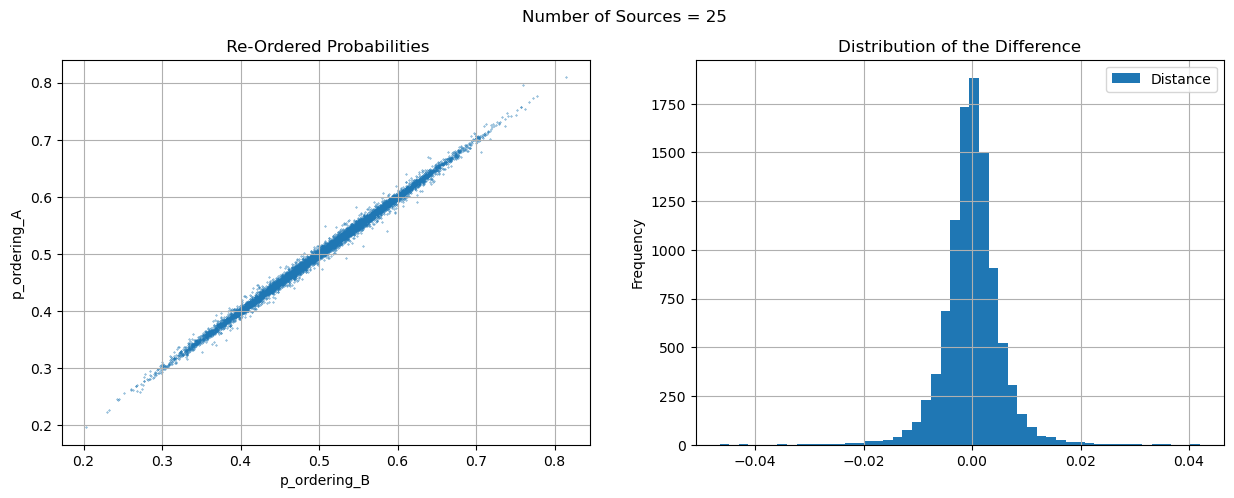

In [3]:
number_of_sources=25

V2=sim(number_of_sources=number_of_sources,draws=10000)
#Graph the outcome above
pltsize(5,15)
fig,ax=plt.subplots(1,2)
fig.suptitle('Number of Sources = ' +str(number_of_sources))
V2.plot(kind='scatter',y='p_ordering_A',x='p_ordering_B',grid=True, title=' Re-Ordered Probabilities',ax=ax[0],s=.1)
V2.plot(kind='hist',y='Distance',bins=50,grid=True, title='Distribution of the Difference',ax=ax[1])
#plt.savefig(direcout+'FigA1.2'+'.png',bbox_inches='tight')